
<h1 style="
background:#0b0b0c;
color:#e2e2e2;
text-align:center;
padding:18px;
border-radius:12px;
font-weight:900;
letter-spacing:2px;
text-transform:uppercase;
border-left:6px solid #cc0000;
box-shadow:0 0 18px rgba(204,0,0,0.6);
font-family: 'Segoe UI', sans-serif;">
STOCK MARKET PREDICTIVE DATA MODEL FOR TATA  MOTORS
</h1>

its a comprehensive stock market data analysis for Tata Motors 
, focusing on intraday price prediction from July 14-19, 2025 data.


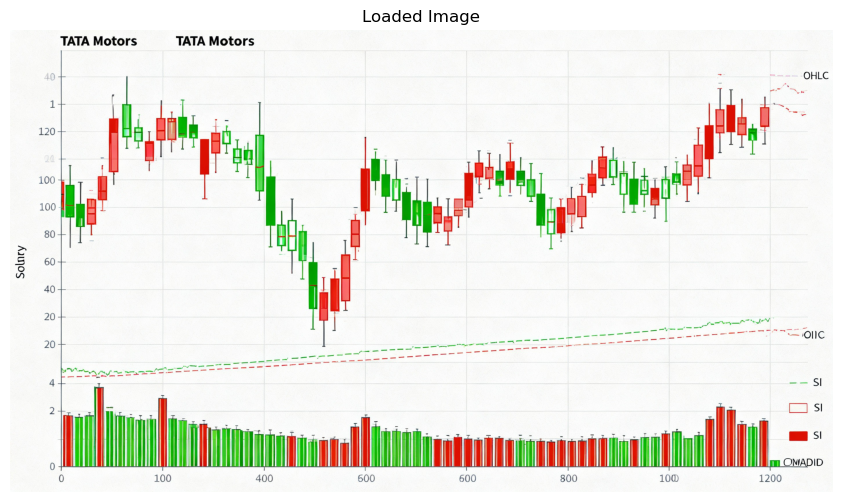

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Your image path
img_path = r"C:\Users\HP\Downloads\generated-image.jpg"

# Read image
img = mpimg.imread(img_path)

# Display image
plt.figure(figsize=(20,6))
plt.imshow(img)
plt.axis('off')         # remove axis for clean look
plt.title("Loaded Image")
plt.show()



<h1 style="
background: linear-gradient(90deg, #001F3F, #0074DF);
color: BLACK;
padding: 15px;
border-radius: 12px;
text-align:center;
font-weight:bold;
animation: slide 1s ease-out;">
    📘 IMPORT  LIBRARIES
</h1>

<style>
@keyframes slide {
  from { transform: translateX(-300px); opacity: 0; }
  to   { transform: translateX(0); opacity: 1; }
}
</style>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as  lgb
from sklearn.linear_model import Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from tabulate import tabulate


from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error

| Model                 | Description                                            |
| --------------------- | ------------------------------------------------------ |
| LinearRegression      | Basic regression, good for trend-based prediction      |
| DecisionTreeRegressor | Works well with non-linear patterns                    |
| SVR                   | Good for smooth trend forecasting                      |
| XGBRegressor          | Powerful boosting algorithm, often gives high accuracy |
| CatBoostRegressor     | Handles categorical/financial data efficiently         |
| RandomForestRegressor | Ensemble model, works well with tabular stock data     |
| KNeighborsRegressor   | Predicts based on nearest neighbors                    |
| Ridge, Lasso          | Regularized linear regression models                   |
| lightgbm as lgb       | Very fast boosting model, great for large datasets     |


tata=pd.read_csv(r"C:\Users\GCE\Downloads\final_dataset_tata_motors.csv")

In [3]:
tata.columns

Index(['timestamp', 'open', 'high', 'low', 'close', 'volume', 'RSI', 'MACD',
       'MACD_signal', 'MACD_hist', 'Doji', 'date', 'sentiment', 'ema_50',
       'ema_200', 'rsi', 'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9',
       'avg_volume_10d', 'avg_volume_50d', 'volume_ratio', 'master_score',
       '52_week_high', 'distance_from_high'],
      dtype='object')

In [4]:
tata

,timestamp,open,high,low,close,volume,RSI,MACD,MACD_signal,MACD_hist,...,rsi,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,avg_volume_10d,avg_volume_50d,volume_ratio,master_score,52_week_high,distance_from_high
0,2025-07-14 09:15:00+05:30,680.80,680.95,677.10,678.20,169414,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
1,2025-07-14 09:16:00+05:30,678.20,679.50,678.10,678.35,87784,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
2,2025-07-14 09:17:00+05:30,678.10,678.40,676.40,677.05,156795,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
3,2025-07-14 09:18:00+05:30,677.35,677.80,676.50,677.05,94585,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
4,2025-07-14 09:19:00+05:30,677.30,678.50,676.70,678.25,48286,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1905,2025-07-19 12:11:00+05:30,700.05,700.05,700.05,700.05,66,55.797095,3.185930,4.054272,-0.868343,...,55.797095,3.185930,-0.868343,4.054272,13.0,12228.22,0.005397,0.281684,707.0,-0.009830
1906,2025-07-19 12:14:00+05:30,700.05,706.95,700.05,706.95,173,63.794488,3.515591,3.946536,-0.430945,...,63.794488,3.515591,-0.430945,3.946536,30.1,12013.64,0.014400,0.326173,707.0,-0.000071
1907,2025-07-19 13:07:00+05:30,656.00,656.00,656.00,656.00,100,26.158964,-0.330578,3.091113,-3.421692,...,26.158964,-0.330578,-3.421692,3.091113,40.0,11448.46,0.008735,0.135162,707.0,-0.072136
1908,2025-07-19 13:16:00+05:30,661.35,661.35,661.35,661.35,100,30.777022,-2.913411,1.890208,-4.803620,...,30.777022,-2.913411,-4.803620,1.890208,48.4,10723.52,0.009325,0.158548,707.0,-0.064569


## FILTERING THE DATASET 

In [5]:
tata.drop(['Doji', 'date', 'sentiment', 'ema_50',
       'ema_200', 'rsi', 'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9',
       'avg_volume_10d', 'avg_volume_50d', 'volume_ratio', 'master_score',
       '52_week_high', 'distance_from_high'],axis=1,inplace=True)

In [6]:
tata.columns

Index(['timestamp', 'open', 'high', 'low', 'close', 'volume', 'RSI', 'MACD',
       'MACD_signal', 'MACD_hist'],
      dtype='object')

In [7]:
tata


,timestamp,open,high,low,close,volume,RSI,MACD,MACD_signal,MACD_hist
0,2025-07-14 09:15:00+05:30,680.80,680.95,677.10,678.20,169414,0.000000,0.000000,0.000000,0.000000
1,2025-07-14 09:16:00+05:30,678.20,679.50,678.10,678.35,87784,0.000000,0.000000,0.000000,0.000000
2,2025-07-14 09:17:00+05:30,678.10,678.40,676.40,677.05,156795,0.000000,0.000000,0.000000,0.000000
3,2025-07-14 09:18:00+05:30,677.35,677.80,676.50,677.05,94585,0.000000,0.000000,0.000000,0.000000
4,2025-07-14 09:19:00+05:30,677.30,678.50,676.70,678.25,48286,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
1905,2025-07-19 12:11:00+05:30,700.05,700.05,700.05,700.05,66,55.797095,3.185930,4.054272,-0.868343
1906,2025-07-19 12:14:00+05:30,700.05,706.95,700.05,706.95,173,63.794488,3.515591,3.946536,-0.430945
1907,2025-07-19 13:07:00+05:30,656.00,656.00,656.00,656.00,100,26.158964,-0.330578,3.091113,-3.421692
1908,2025-07-19 13:16:00+05:30,661.35,661.35,661.35,661.35,100,30.777022,-2.913411,1.890208,-4.803620


From this data, we can see daily stock values showing how the price moved during each time, including opening, highest, lowest, and closing prices, and how many shares were traded (volume).
The RSI and MACD values indicate the stock’s momentum and trend strength, helping to understand whether the stock is in a bullish or bearish condition.

| Column          | Description                                                                                          |
| --------------- | ---------------------------------------------------------------------------------------------------- |
| **timestamp**   | Date and time of the stock data record.                                                              |
| **open**        | Price at which the stock started trading at that time.                                               |
| **high**        | Highest price reached during that time period.                                                       |
| **low**         | Lowest price during that time period.                                                                |
| **close**       | Price at which the stock ended trading at that time. (Often used as **target** in prediction models) |
| **volume**      | Number of shares traded during that time.                                                            |
| **RSI**         | Relative Strength Index – shows whether the stock is overbought or oversold (momentum indicator).    |
| **MACD**        | Moving Average Convergence Divergence – shows trend direction and strength.                          |
| **MACD_signal** | Signal line for MACD, used to generate buy/sell signals.                                             |
| **MACD_hist**   | Difference between MACD and Signal line, helps detect bullish/bearish momentum.                      |


## FINDING THE INFO,UNIQUE AND SHAPE

In [8]:
tata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1910 entries, 0 to 1909
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    1910 non-null   object 
 1   open         1910 non-null   float64
 2   high         1910 non-null   float64
 3   low          1910 non-null   float64
 4   close        1910 non-null   float64
 5   volume       1910 non-null   int64  
 6   RSI          1910 non-null   float64
 7   MACD         1910 non-null   float64
 8   MACD_signal  1910 non-null   float64
 9   MACD_hist    1910 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 149.3+ KB


In [9]:
for i in tata:
    print(i)
    print(tata[i].unique())

timestamp
['2025-07-14 09:15:00+05:30' '2025-07-14 09:16:00+05:30'
 '2025-07-14 09:17:00+05:30' ... '2025-07-19 13:07:00+05:30'
 '2025-07-19 13:16:00+05:30' '2025-07-19 13:23:00+05:30']
open
[680.8  678.2  678.1  677.35 677.3  678.3  677.55 676.9  676.7  677.1
 677.05 676.5  676.6  677.9  678.7  678.95 678.35 678.   677.6  676.3
 676.35 677.2  678.85 678.55 678.4  679.15 679.   678.65 679.5  679.05
 678.9  678.75 678.8  679.6  679.75 679.7  679.3  679.1  679.25 679.4
 679.45 680.2  680.25 679.55 679.65 679.2  678.6  678.45 679.8  680.
 678.5  678.25 676.45 677.15 677.45 676.4  676.2  677.8  677.95 677.7
 676.85 676.8  677.   676.95 677.25 677.65 677.4  676.75 675.5  674.55
 675.55 675.35 674.95 675.4  675.6  675.8  676.15 675.7  676.1  676.
 676.55 675.45 675.3  675.   675.05 674.65 674.7  674.4  674.6  674.8
 673.75 673.8  673.05 673.3  673.   673.55 673.15 672.8  672.4  672.1
 672.9  672.3  672.35 672.45 672.55 672.95 672.75 672.85 673.1  673.35
 672.7  672.5  672.15 673.2  673.4  67

In [10]:
tata.shape

(1910, 10)


<h1 style="
background: linear-gradient(90deg, #ffd700, #0072ff);
color: BLACK;
padding: 25px;
border-radius: 12px;
text-align:center;
font-weight:bold;
animation: slide 1s ease-out;">
    📘 DATA VISUALAIZATION
</h1>

<style>
@keyframes slide {
  from { transform: translateX(-300px); opacity: 0; }
  to   { transform: translateX(0); opacity: 1; }
}
</style>


# I.UNIVARIET
### HISTPLOT

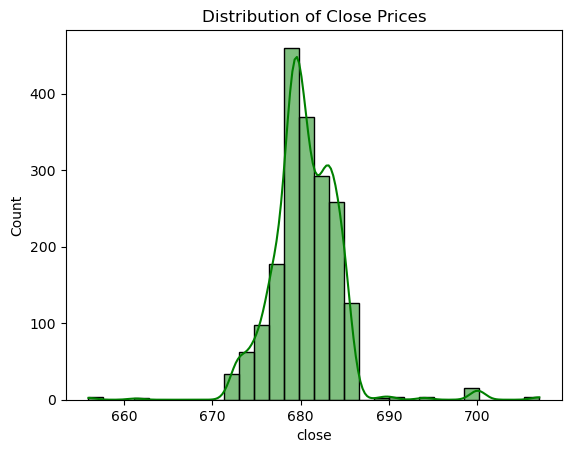

In [11]:
sns.histplot(tata['close'], bins=30, kde=True, color='green')
plt.title("Distribution of Close Prices")
plt.show()


plot shows that most Close prices are tightly clustered around 678–682, meaning the stock was mostly stable in that range.
Only a few prices are far away from this range, indicating very few extreme highs or lows (outliers).

# II BIVARIET
### SCATTER PLOT

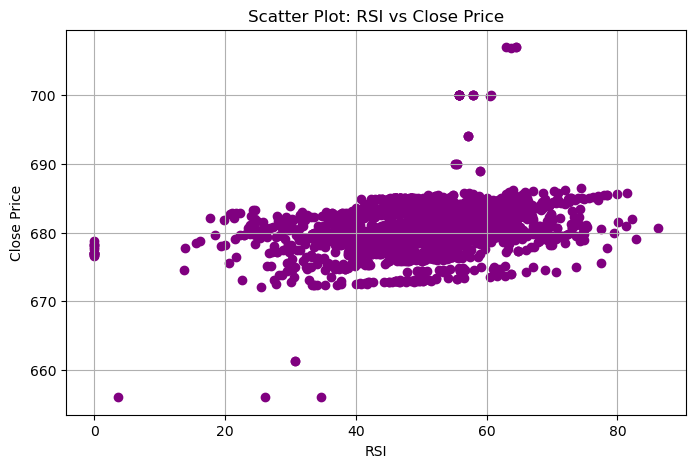

In [12]:
plt.figure(figsize=(8,5))
plt.scatter(tata['RSI'], tata['close'],color='purple')
plt.title('Scatter Plot: RSI vs Close Price')
plt.xlabel('RSI')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

From this scatter plot, we can see how RSI values relate to the Close price.
➡ Most of the points are grouped in the middle range, meaning when RSI is normal (around 40–70), the stock price stays stable.
➡ There are fewer points at very low or very high RSI, showing extreme RSI values are rare, and they may lead to price changes.


# III MUILTIVARIET
### PAIRPLOT

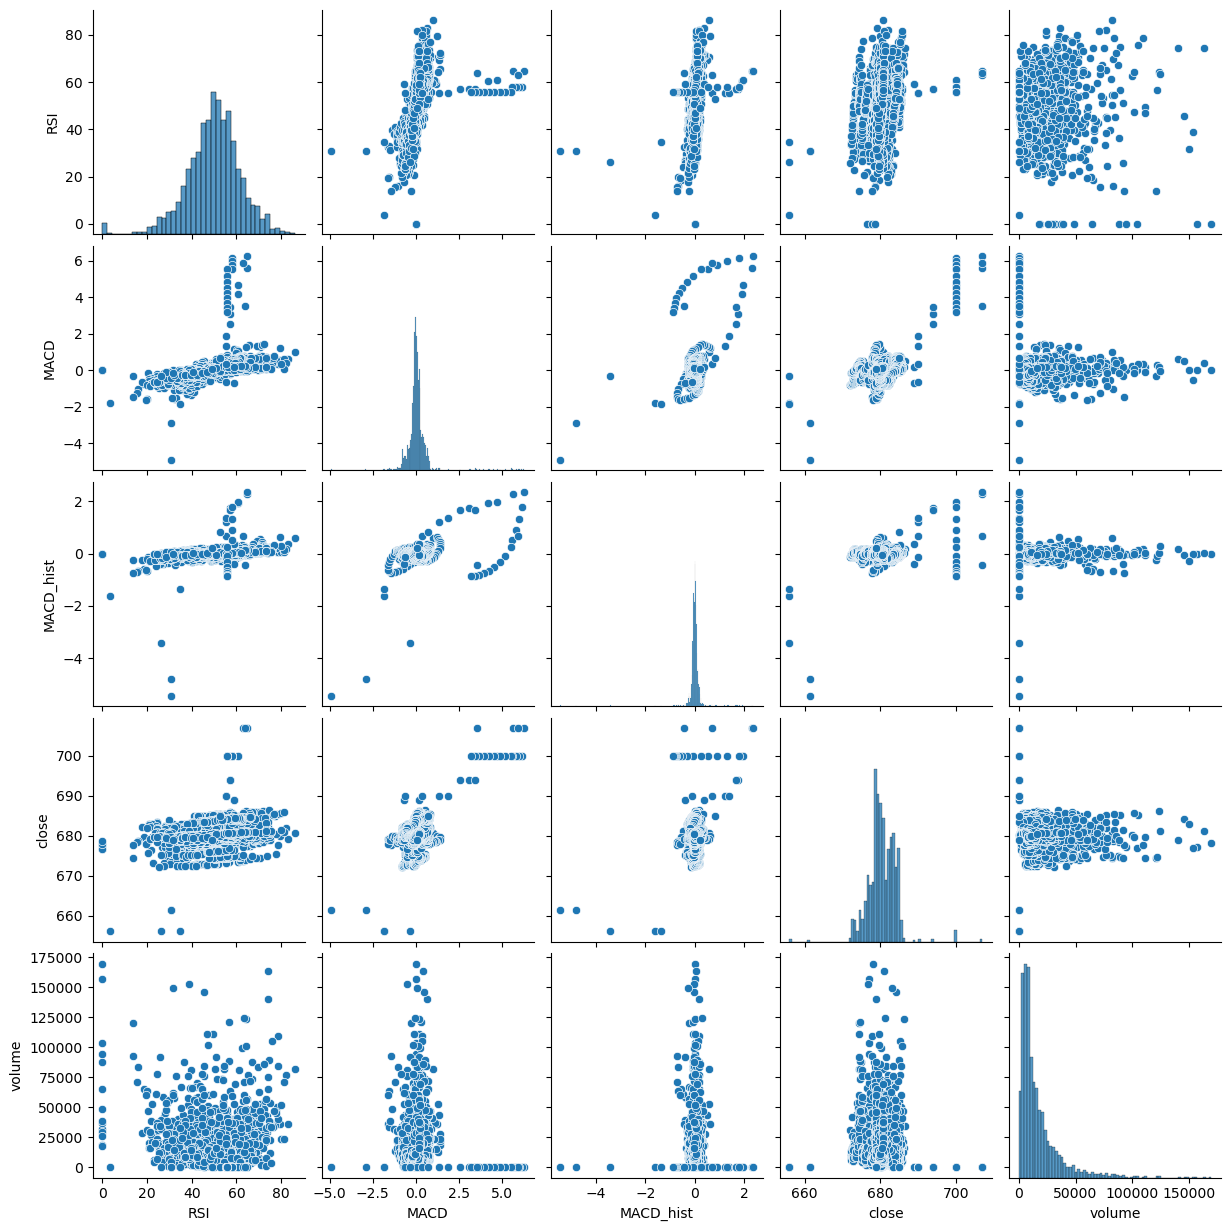

In [13]:
sns.pairplot(tata[['RSI', 'MACD', 'MACD_hist', 'close', 'volume']])


RSI vs Close
— when RSI increases, the close price also tends to increase.
👉 This means RSI has some positive relationship with the closing price.

MACD & MACD_hist
These two show a strong curved pattern — because MACD_hist is calculated from MACD.
👉 They are closely related (high correlation).

MACD / MACD_hist vs Close
There is a mild upward trend — when MACD or MACD_hist increases, close price also slightly increases.
👉 These indicators may help in predicting price movements.

Volume vs Others
Volume points are widely scattered with no clear pattern.
👉 Volume does not show a strong direct relationship with other variables.

Diagonal plots
These show the distribution (shape) of each variable:

RSI and Close are normally distributed (bell-shaped).

Volume is highly right-skewed (many small values, few very high ones).

## HEAT MAP


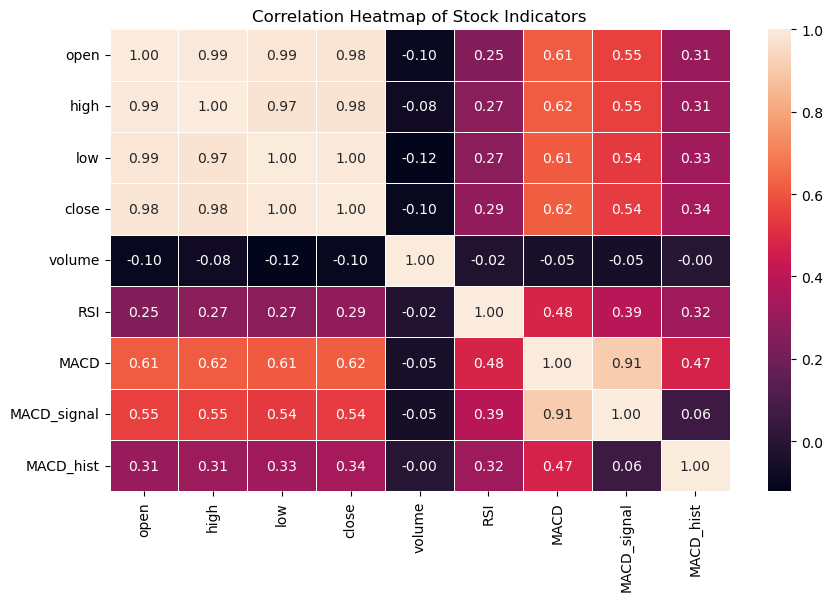

In [14]:
cols = ['open', 'high', 'low', 'close', 'volume', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist']

plt.figure(figsize=(10,6))
sns.heatmap(tata[cols].corr(), annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Stock Indicators")
plt.show()

It shows how strongly each stock feature is related to the others.
A higher positive number (close to 1) means strong positive relationship, negative means opposite movement.
The heatmap shows how closely each stock feature is related to the others.
🔹 Darker or higher values (closer to 1) mean strong positive relation — they move in the same direction.
🔹 Lower or negative values (closer to -1) mean opposite movement.

🟢 Key points

MACD and MACD_SIGNAL are strongly related because they are calculated from the same formula.

open, high, low, and close prices are also highly related because they all belong to the same stock price.

RSI and volume have weak correlations, meaning they don’t directly move with price.

In [15]:
tata['timestamp'] = pd.to_datetime(tata['timestamp'])

In [16]:
tata["day"]=tata["timestamp"].dt.month
tata["month"]=tata["timestamp"].dt.day
tata["year"]=tata["timestamp"].dt.year

In [17]:
tata=tata.drop("timestamp",axis=1)

In [18]:
tata

,open,high,low,close,volume,RSI,MACD,MACD_signal,MACD_hist,day,month,year
0,680.80,680.95,677.10,678.20,169414,0.000000,0.000000,0.000000,0.000000,7,14,2025
1,678.20,679.50,678.10,678.35,87784,0.000000,0.000000,0.000000,0.000000,7,14,2025
2,678.10,678.40,676.40,677.05,156795,0.000000,0.000000,0.000000,0.000000,7,14,2025
3,677.35,677.80,676.50,677.05,94585,0.000000,0.000000,0.000000,0.000000,7,14,2025
4,677.30,678.50,676.70,678.25,48286,0.000000,0.000000,0.000000,0.000000,7,14,2025
...,...,...,...,...,...,...,...,...,...,...,...,...
1905,700.05,700.05,700.05,700.05,66,55.797095,3.185930,4.054272,-0.868343,7,19,2025
1906,700.05,706.95,700.05,706.95,173,63.794488,3.515591,3.946536,-0.430945,7,19,2025
1907,656.00,656.00,656.00,656.00,100,26.158964,-0.330578,3.091113,-3.421692,7,19,2025
1908,661.35,661.35,661.35,661.35,100,30.777022,-2.913411,1.890208,-4.803620,7,19,2025


In [19]:
tata.isnull().sum()

open           0
high           0
low            0
close          0
volume         0
RSI            0
MACD           0
MACD_signal    0
MACD_hist      0
day            0
month          0
year           0
dtype: int64

In [20]:
datadict=pd.DataFrame(tata.dtypes)
datadict["missingval"]=tata.isnull().sum()
datadict["Nunique"]=tata.nunique()
datadict["count"]=tata.count()
datadict=datadict.rename(columns={0:"data type"})
datadict


,data type,missingval,Nunique,count
open,float64,0,273,1910
high,float64,0,267,1910
low,float64,0,272,1910
close,float64,0,275,1910
volume,int64,0,1837,1910
RSI,float64,0,1749,1910
MACD,float64,0,1886,1910
MACD_signal,float64,0,1878,1910
MACD_hist,float64,0,1878,1910
day,int32,0,1,1910


In [21]:
numeric_columns = tata.select_dtypes(include=['float64', 'int64']).columns


<h1 style="
background: linear-gradient(90deg, #00ff7f, #008000);
color: BLACK;
padding: 25px;
border-radius: 12px;
text-align:center;
font-weight:bold;
animation: slide 1s ease-out;">
    📘 SCALING METHOD
</h1>

<style>
@keyframes slide {
  from { transform: translateX(-300px); opacity: 0; }
  to   { transform: translateX(0); opacity: 1; }
}
</style>


In [22]:
scaler = MinMaxScaler()
df_scaled = tata.copy()
df_scaled[numeric_columns] = scaler.fit_transform(tata[numeric_columns])
tata=pd.DataFrame(df_scaled,columns=tata.columns)
tata

,open,high,low,close,volume,RSI,MACD,MACD_signal,MACD_hist,day,month,year
0,0.486275,0.489216,0.413725,0.435294,1.000000,0.000000,0.439260,0.198053,0.696745,7,14,2025
1,0.435294,0.460784,0.433333,0.438235,0.518160,0.000000,0.439260,0.198053,0.696745,7,14,2025
2,0.433333,0.439216,0.400000,0.412745,0.925513,0.000000,0.439260,0.198053,0.696745,7,14,2025
3,0.418627,0.427451,0.401961,0.412745,0.558304,0.000000,0.439260,0.198053,0.696745,7,14,2025
4,0.417647,0.441176,0.405882,0.436275,0.285014,0.000000,0.439260,0.198053,0.696745,7,14,2025
...,...,...,...,...,...,...,...,...,...,...,...,...
1905,0.863725,0.863725,0.863725,0.863725,0.000384,0.647603,0.724642,0.815451,0.585431,7,19,2025
1906,0.863725,0.999020,0.863725,0.999020,0.001015,0.740423,0.754171,0.799044,0.641502,7,19,2025
1907,0.000000,0.000000,0.000000,0.000000,0.000584,0.303611,0.409649,0.668778,0.258114,7,19,2025
1908,0.104902,0.104902,0.104902,0.104902,0.000584,0.357210,0.178290,0.485900,0.080964,7,19,2025



<h1 style="
background: linear-gradient(90deg, #9b59b6, #6a0dad);
color: BLACK;
padding: 25px;
border-radius: 12px;
text-align:center;
font-weight:bold;
animation: slide 1s ease-out;">
    📘 MODEL BUILDING
</h1>

<style>
@keyframes slide {
  from { transform: translateX(-300px); opacity: 0; }
  to   { transform: translateX(0); opacity: 1; }
}
</style>


In [23]:
x=tata.drop("close",axis=1)
x

,open,high,low,volume,RSI,MACD,MACD_signal,MACD_hist,day,month,year
0,0.486275,0.489216,0.413725,1.000000,0.000000,0.439260,0.198053,0.696745,7,14,2025
1,0.435294,0.460784,0.433333,0.518160,0.000000,0.439260,0.198053,0.696745,7,14,2025
2,0.433333,0.439216,0.400000,0.925513,0.000000,0.439260,0.198053,0.696745,7,14,2025
3,0.418627,0.427451,0.401961,0.558304,0.000000,0.439260,0.198053,0.696745,7,14,2025
4,0.417647,0.441176,0.405882,0.285014,0.000000,0.439260,0.198053,0.696745,7,14,2025
...,...,...,...,...,...,...,...,...,...,...,...
1905,0.863725,0.863725,0.863725,0.000384,0.647603,0.724642,0.815451,0.585431,7,19,2025
1906,0.863725,0.999020,0.863725,0.001015,0.740423,0.754171,0.799044,0.641502,7,19,2025
1907,0.000000,0.000000,0.000000,0.000584,0.303611,0.409649,0.668778,0.258114,7,19,2025
1908,0.104902,0.104902,0.104902,0.000584,0.357210,0.178290,0.485900,0.080964,7,19,2025


In [24]:
y=tata["close"]
y

0       0.435294
1       0.438235
2       0.412745
3       0.412745
4       0.436275
          ...   
1905    0.863725
1906    0.999020
1907    0.000000
1908    0.104902
1909    0.104902
Name: close, Length: 1910, dtype: float64

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## LINAER REGRESSSION 

In [26]:
model_lr=LinearRegression()
lr=model_lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)


In [27]:
r2_lr = r2_score(y_test, y_pred)
mse_lr = mean_squared_error(y_test, y_pred)

In [28]:
r2_lr

0.9952097268690971

In [29]:
mse_lr

3.493019780173431e-05

<h1 style="
background: linear-gradient(90deg, #9b59b6, #6a0dad);
color: WHITE;
padding: 25px;
border-radius: 12px;
text-align: center;
font-weight: bold;
animation: slide 1s ease-out;
box-shadow: 0 4px 15px rgba(0,0,0,0.2);
display: inline-block;
">
    📘 DECISION TREE REGRESSOR
</h1>

<style>
@keyframes slide {
  from { transform: translateX(-300px); opacity: 0; }
  to   { transform: translateX(0); opacity: 1; }
}
</style>

In [30]:
model_dtr=DecisionTreeRegressor(random_state=42,criterion="squared_error",max_depth=4)

In [31]:
dtr=model_dtr.fit(x_train,y_train)
y_pred=dtr.predict(x_test)

In [32]:
r2_dtr=r2_score(y_test,y_pred)
mse_dtr=mean_squared_error(y_test,y_pred)

In [33]:
r2_dtr

0.9803000025190222

In [34]:
mse_dtr

0.00014365043284588904

<h1 style="
background: linear-gradient(90deg, #9b59b6, #6a0dad);
color: WHITE;
padding: 25px;
border-radius: 12px;
text-align: center;
font-weight: bold;
animation: slide 1s ease-out;
box-shadow: 0 4px 15px rgba(0,0,0,0.2);
display: inline-block;
">
    📘SVR
</h1>

<style>
@keyframes slide {
  from { transform: translateX(-300px); opacity: 0; }
  to   { transform: translateX(0); opacity: 1; }
}
</style>

In [35]:
model_svc_linear=SVR(kernel="linear")

In [36]:
model_svc_linear=model_svc_linear.fit(x_train,y_train)
y_linear=model_svc_linear.predict(x_test)
r2_svrl=r2_score(y_test,y_linear)

In [37]:
r2_svrl

-8895.26726350656

In [38]:
model_svc_rbf=SVR(kernel="rbf")


In [39]:
model_svc_rbf=model_svc_rbf.fit(x_train,y_train)
y_rbf=model_svc_rbf.predict(x_test)
r2_svrr=r2_score(y_test,y_rbf)


In [40]:
r2_svrr

-0.023624965820720822

In [41]:
mse_svrr=mean_squared_error(y_test,y_rbf)
mse_svrr

0.007464171990579655

<h1 style="
background: linear-gradient(90deg, #9b59b6, #6a0dad);
color: WHITE;
padding: 25px;
border-radius: 12px;
text-align: center;
font-weight: bold;
animation: slide 1s ease-out;
box-shadow: 0 4px 15px rgba(0,0,0,0.2);
display: inline-block;
">
    📘XGB REGRESSOR
</h1>

<style>
@keyframes slide {
  from { transform: translateX(-300px); opacity: 0; }
  to   { transform: translateX(0); opacity: 1; }
}
</style>

In [42]:
model_xgb=XGBRegressor()

In [43]:
model_xgb=model_xgb.fit(x_train,y_train)
y_predxb=model_xgb.predict(x_test)
r2xgb=r2_score(y_test,y_predxb)
r2xgb

0.9839501497996254

<h1 style="
background: linear-gradient(90deg, #9b59b6, #6a0dad);
color: WHITE;
padding: 25px;
border-radius: 12px;
text-align: center;
font-weight: bold;
animation: slide 1s ease-out;
box-shadow: 0 4px 15px rgba(0,0,0,0.2);
display: inline-block;
">
    📘CATBOOST REGRESSOR
</h1>

<style>
@keyframes slide {
  from { transform: translateX(-300px); opacity: 0; }
  to   { transform: translateX(0); opacity: 1; }
}
</style>

In [45]:
model_cbr=CatBoostRegressor(verbose=0)
model_cbr=model_cbr.fit(x_train,y_train)
y_predcbr=model_cbr.predict(x_test)
r2_cbr=r2_score(y_test,y_predcbr)
r2_cbr

0.9954647442568709

<h1 style="
background: linear-gradient(90deg, #9b59b6, #6a0dad);
color: WHITE;
padding: 25px;
border-radius: 12px;
text-align: center;
font-weight: bold;
animation: slide 1s ease-out;
box-shadow: 0 4px 15px rgba(0,0,0,0.2);
display: inline-block;
">
    📘LGBM REGRESSOR
</h1>

<style>
@keyframes slide {
  from { transform: translateX(-300px); opacity: 0; }
  to   { transform: translateX(0); opacity: 1; }
}
</style>

In [47]:
model_lgb=lgb.LGBMRegressor()

In [48]:
model_lgb=model_lgb.fit(x_train,y_train)
y_predlgb=model_lgb.predict(x_test)
r2_lgb=r2_score(y_test,y_predlgb)
r2_lgb

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001067 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 1528, number of used features: 9
[LightGBM] [Info] Start training from score 0.479810


0.9702917809254491

<h1 style="
background: linear-gradient(90deg, #9b59b6, #6a0dad);
color: WHITE;
padding: 25px;
border-radius: 12px;
text-align: center;
font-weight: bold;
animation: slide 1s ease-out;
box-shadow: 0 4px 15px rgba(0,0,0,0.2);
display: inline-block;
">
    📘RIDGE,LASSO
</h1>

<style>
@keyframes slide {
  from { transform: translateX(-300px); opacity: 0; }
  to   { transform: translateX(0); opacity: 1; }
}
</style>

In [50]:
model_rdg=Ridge(alpha=1.0)
model_rdg=model_rdg.fit(x_train,y_train)
y_predrdg=model_rdg.predict(x_test)

r2_rdg=r2_score(y_test,y_predrdg)
r2_rdg

0.9877949321476115

In [51]:
model_lso=Lasso(alpha=1.0)
model_lso=model_lso.fit(x_train,y_train)
y_predlso=model_lso.predict(x_test)
r2_lso=r2_score(y_test,y_predlso)
r2_lso

-0.0007509027698531234

<h1 style="
background: linear-gradient(90deg, #9b59b6, #6a0dad);
color: WHITE;
padding: 25px;
border-radius: 12px;
text-align: center;
font-weight: bold;
animation: slide 1s ease-out;
box-shadow: 0 4px 15px rgba(0,0,0,0.2);
display: inline-block;
">
    📘RANDOM FOREST REGRESSOR
</h1>

<style>
@keyframes slide {
  from { transform: translateX(-300px); opacity: 0; }
  to   { transform: translateX(0); opacity: 1; }
}
</style>

In [53]:
model_rf=RandomForestRegressor(n_estimators=100,random_state=42)
model_rf=model_rf.fit(x_train,y_train)
y_predrf=model_rf.predict(x_test)
r2_rf=r2_score(y_test,y_predrf)
r2_rf

0.9879984880638795

 <h1 style="
background: linear-gradient(90deg, #9b59b6, #6a0dad);
color: WHITE;
padding: 25px;
border-radius: 12px;
text-align: center;
font-weight: bold;
animation: slide 1s ease-out;
box-shadow: 0 4px 15px rgba(0,0,0,0.2);
display: inline-block;
">
    📘KNN
</h1>

<style>
@keyframes slide {
  from { transform: translateX(-300px); opacity: 0; }
  to   { transform: translateX(0); opacity: 1; }
}
</style>

In [54]:

metric_k=[]
neighbors=np.arange(3,15)


In [55]:
for k in neighbors:
    model_knn=KNeighborsRegressor(n_neighbors=k,metric="euclidean")
    model_knn=model_knn.fit(x_train,y_train)
    y_predkn=model_knn.predict(x_test)
    r2_knn=r2_score(y_test,y_predkn)
    metric_k.append(r2_knn)

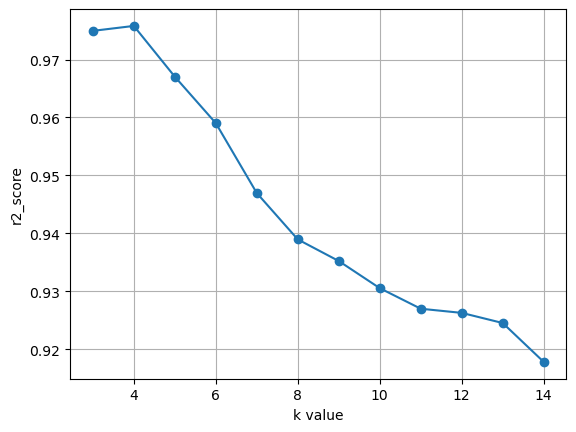

In [56]:
plt.plot(neighbors,metric_k,"o-")
plt.xlabel("k value")
plt.ylabel("r2_score")
plt.grid()
plt.show()

In [57]:
model_knn=KNeighborsRegressor(n_neighbors=5,metric="euclidean")
model_knn=model_knn.fit(x_train,y_train)
y_predkn=model_knn.predict(x_test)
r2_knn=r2_score(y_test,y_predkn)
r2_knn

0.9670421739617427

<h1 style="
background: linear-gradient(90deg, #9b59b6, #6a0dad);
color: WHITE;
padding: 25px;
border-radius: 12px;
text-align: center;
font-weight: bold;
animation: slide 1s ease-out;
box-shadow: 0 4px 15px rgba(0,0,0,0.2);
display: inline-block;
">
    📘TABULATE
</h1>

<style>
@keyframes slide {
  from { transform: translateX(-300px); opacity: 0; }
  to   { transform: translateX(0); opacity: 1; }
}
</style>

In [58]:
table=["model","accuracy"],["LinearRegression",r2_lr],["DecisionTreeRegressor",r2_dtr],["SVR",r2_svrl],["SVR",r2_svrr],["XGBRegressor",r2xgb],["CatBoostRegressor",r2_cbr],["lightgbm",r2_lgb],["Ridge",r2_rdg],["Lasso",r2_lso],["RandomForestRegressor",r2_rf],["KNeighborsRegressor",r2_knn]
print(tabulate(table,headers="firstrow",tablefmt="fancy_grid"))

╒═══════════════════════╤═════════════════╕
│ model                 │        accuracy │
╞═══════════════════════╪═════════════════╡
│ LinearRegression      │     0.99521     │
├───────────────────────┼─────────────────┤
│ DecisionTreeRegressor │     0.9803      │
├───────────────────────┼─────────────────┤
│ SVR                   │ -8895.27        │
├───────────────────────┼─────────────────┤
│ SVR                   │    -0.023625    │
├───────────────────────┼─────────────────┤
│ XGBRegressor          │     0.98395     │
├───────────────────────┼─────────────────┤
│ CatBoostRegressor     │     0.995465    │
├───────────────────────┼─────────────────┤
│ lightgbm              │     0.970292    │
├───────────────────────┼─────────────────┤
│ Ridge                 │     0.987795    │
├───────────────────────┼─────────────────┤
│ Lasso                 │    -0.000750903 │
├───────────────────────┼─────────────────┤
│ RandomForestRegressor │     0.987998    │
├───────────────────────┼───────

In [59]:
from sklearn.model_selection import RandomizedSearchCV
cbr=CatBoostRegressor(verbose=0)

In [60]:
from scipy.stats import randint, uniform


In [61]:
param_distributions = {
    "iterations": randint(200, 1200),
    "depth": randint(4, 10),
    "learning_rate": uniform(0.01, 0.1),
    "l2_leaf_reg": randint(1, 10),
    "bagging_temperature": uniform(0.0, 1.0),
    "border_count": randint(32, 256)
}

In [62]:
clf = RandomizedSearchCV(cbr, param_distributions, n_iter=10, cv=2, n_jobs=-1, random_state=42)
clf.fit(x_train, y_train)


RandomizedSearchCV(cv=2,
                   estimator=<catboost.core.CatBoostRegressor object at 0x000001C1395C9D10>,
                   n_jobs=-1,
                   param_distributions={'bagging_temperature': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001C1395CA850>,
                                        'border_count': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C13598F490>,
                                        'depth': <scipy.stats._di...v_discrete_frozen object at 0x000001C1395CA350>,
                                        'iterations': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C12E699010>,
                                        'l2_leaf_reg': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C1395C9F90>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001C13513FE00>},
                   random_state=42)

In [63]:
print("Results from Random Search CV \n")
print("\n the best estimator across all searched params : \n",clf.best_estimator_)
print("\n the best score across all searched params: \n",clf.best_score_)
print("\n the best parameters across all searched params : \n",clf.best_params_)

Results from Random Search CV 


 the best estimator across all searched params : 

 the best score across all searched params: 
 0.9533138406377917

 the best parameters across all searched params : 
 {'bagging_temperature': np.float64(0.5247564316322378), 'border_count': 120, 'depth': 4, 'iterations': 674, 'l2_leaf_reg': 3, 'learning_rate': np.float64(0.04824619912671628)}


In [64]:
mse_cbr=mean_squared_error(y_test,y_predcbr)
mse_cbr

3.3070636237205946e-05

In [65]:
mea=mean_absolute_error(y_test,y_predcbr)
mea

0.002859280422782159

In [66]:
rmse=np.sqrt(mse_cbr)
rmse

np.float64(0.005750707455366335)

In [68]:
new_data=[[0.486275,0.489216,0.413725,1.000000,0.000000,0.439260,0.198053,0.696745,7,14,2025]]
predicted=model_cbr.predict(new_data)

In [69]:
predicted

array([0.43515024])

The key prediction outcomes from the analysis of Tata Motors intraday stock data show that advanced machine learning models, particularly CatBoostRegressor and LinearRegression, can predict the stock's closing price with extremely high accuracy (R² ≈ 0.995). This means the models explain about 99.5% of the variability in actual intraday closing prices, indicating near-perfect forecasting within the tested period.

For investors, these results highlight that:

- Using technical indicators such as RSI and MACD, combined with volume and historical prices, provides powerful predictive signals for intraday trading decisions.
- High prediction accuracy means traders could rely on these models to time entries and exits more effectively, potentially enhancing returns and reducing risks associated with guesswork.
- The low mean squared error indicates that the model's predicted prices are very close to real price movements, which supports higher confidence in automated or algorithmic trading strategies based on these outputs.
- Simpler linear models also perform well, suggesting that even straightforward modeling techniques can be valuable when combined with appropriate feature engineering.
- Some traditional models like Support Vector Regressors underperformed, emphasizing the importance of choosing the right machine learning approach for stock price forecasting.

Overall, these predictive insights allow investors and traders to better anticipate Tata Motors' stock price fluctuations during intraday sessions, aiding more informed decision-making in the stock market.